In [94]:
# librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
from scipy.stats import f_oneway, ttest_ind, pearsonr

In [10]:
df_estudiantes = pd.read_csv("../data/df_estudiantes.csv")
df_estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_uuid                    7010 non-null   object 
 1   course_uuid                  7010 non-null   object 
 2   legajo                       7010 non-null   object 
 3   course_name                  7010 non-null   object 
 4   periodo                      7010 non-null   object 
 5   particion                    7010 non-null   int64  
 6   fecha_mesa_epoch             7010 non-null   object 
 7   nombre_examen                7010 non-null   object 
 8   nota_parcial                 7010 non-null   float64
 9   nota_final_materia           7010 non-null   float64
 10  aprobado                     7010 non-null   int64  
 11  rango_nota                   7010 non-null   object 
 12  diferencia_notas             7010 non-null   float64
 13  promedio_nota_parc

- Veamos un histograma distribucion de calificaciones 

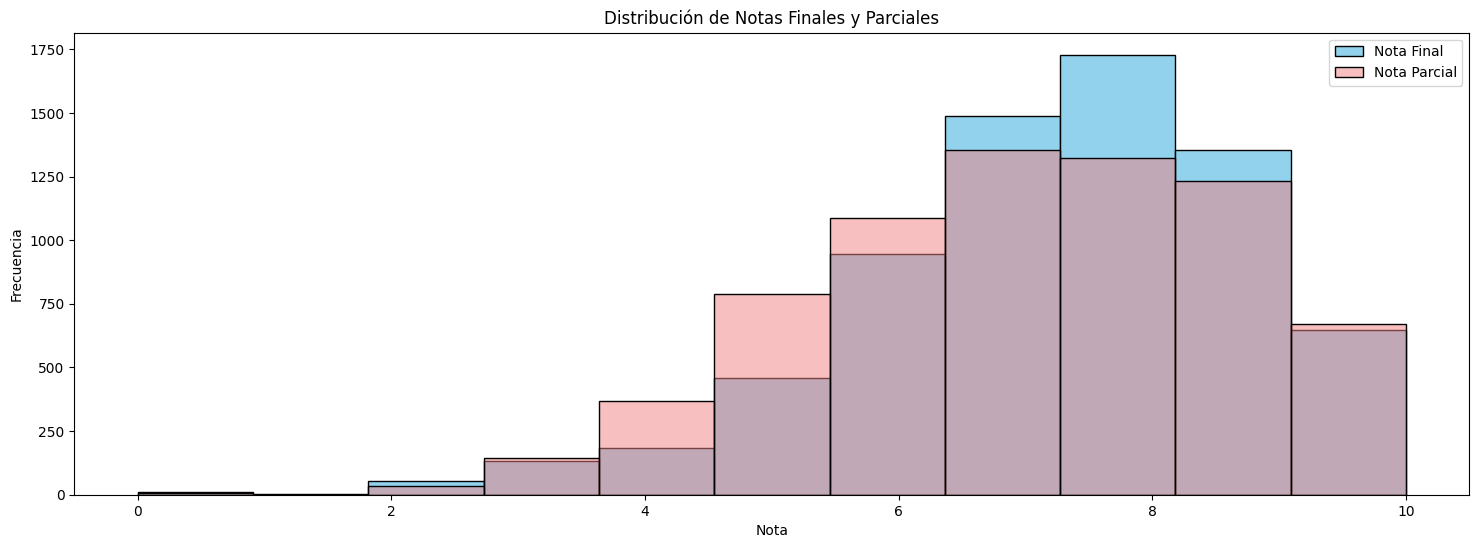

In [11]:
plt.figure(figsize=(18, 6))
sns.histplot(df_estudiantes["nota_final_materia"], bins=11, color="skyblue", label="Nota Final", alpha=0.9)
sns.histplot(df_estudiantes["nota_parcial"], bins=11, color="lightcoral", label="Nota Parcial", alpha=0.5)

plt.title("Distribución de Notas Finales y Parciales")
plt.xlabel("Nota")
plt.ylabel("Frecuencia")
plt.legend()  
plt.show()

En el grafico anterior podemos notar que los datos presentan una distribución asimetrica hacia la izquierda!

- La mayoria de los alumnos obtuvo calificaciones buenas o excelentes.
- Hay un numero reducido de alumnos con calificaciones bajas o desaprobadas.

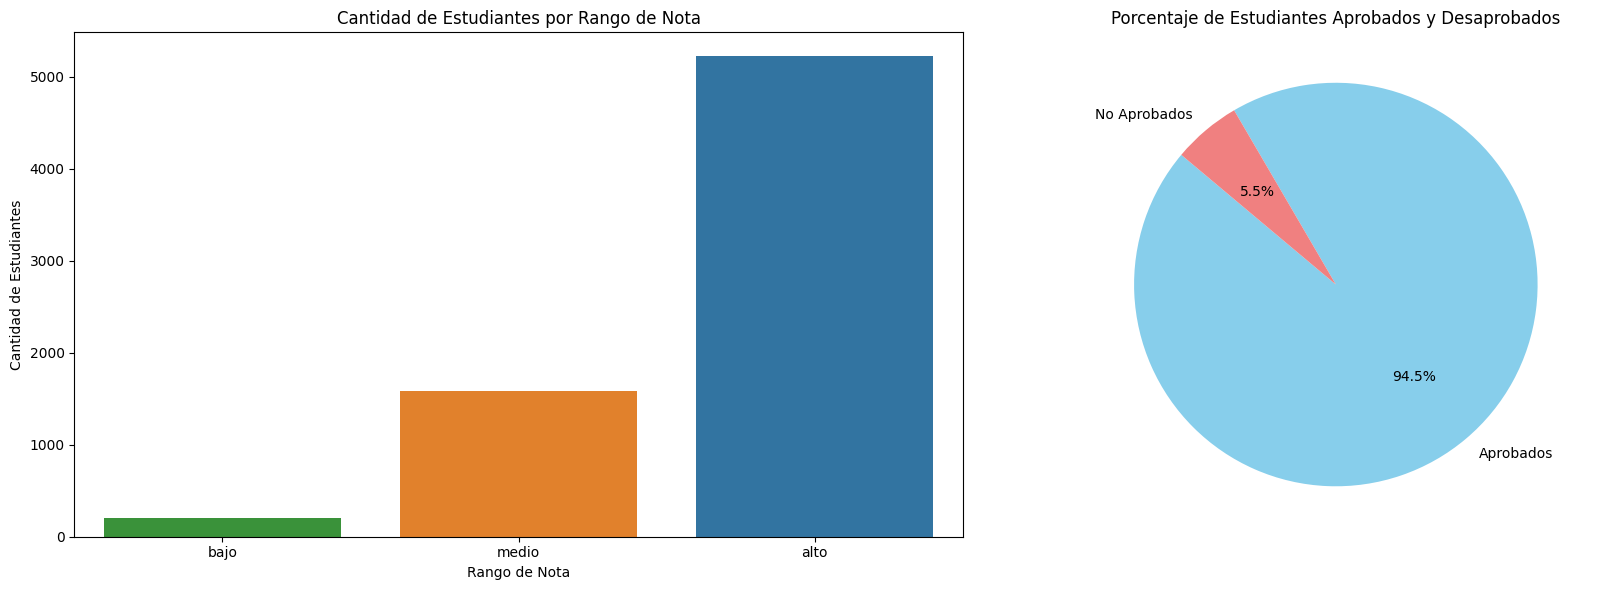

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(x="rango_nota", hue="rango_nota", data=df_estudiantes, order=["bajo", "medio", "alto"], ax=axes[0], legend=False) 

axes[0].set_title("Cantidad de Estudiantes por Rango de Nota")
axes[0].set_xlabel("Rango de Nota")
axes[0].set_ylabel("Cantidad de Estudiantes")

aprobados = df_estudiantes["aprobado"].value_counts()
axes[1].pie(aprobados, labels=["Aprobados","No Aprobados"], autopct="%1.1f%%", startangle=140, colors=["skyblue","lightcoral"])
axes[1].set_title("Porcentaje de Estudiantes Aprobados y Desaprobados")

plt.tight_layout()
plt.show()

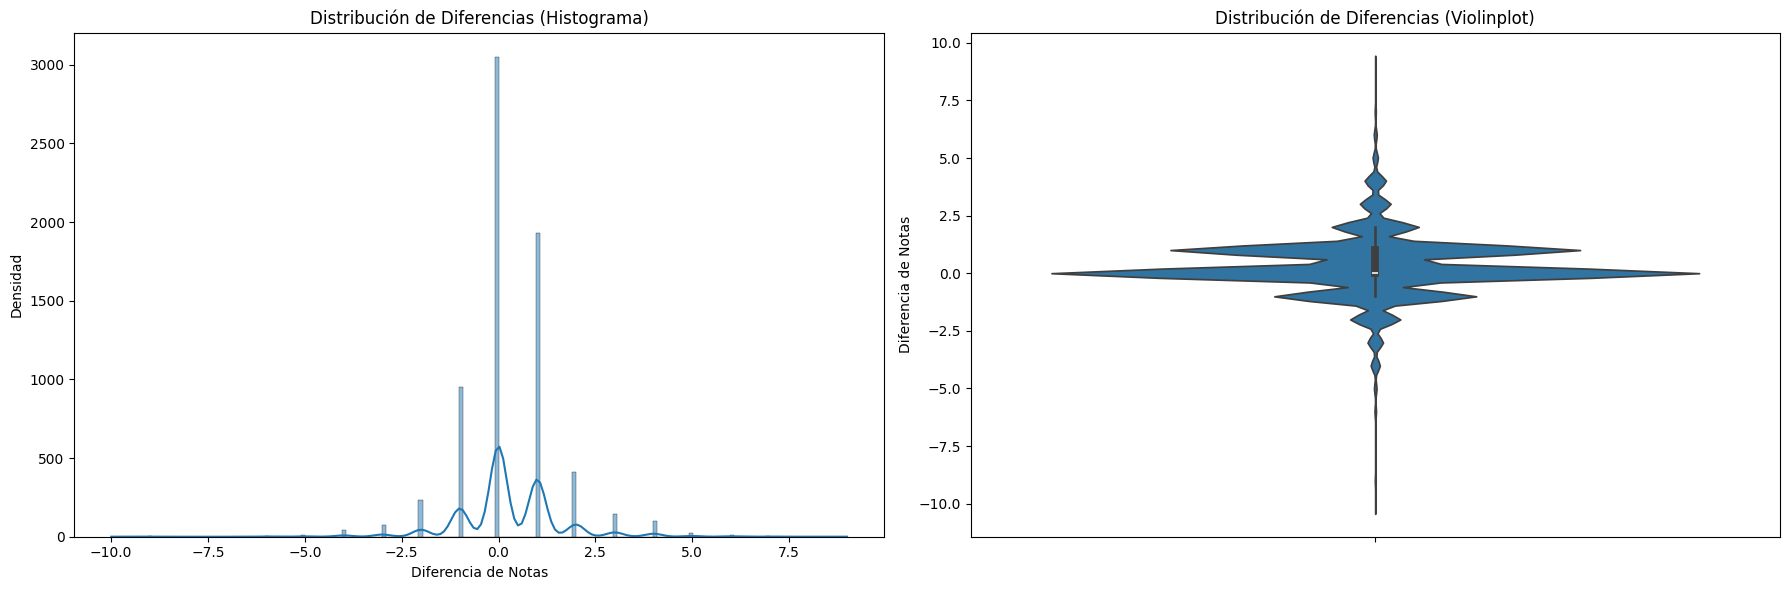

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(df_estudiantes["diferencia_notas"], kde=True, ax=axes[0])
axes[0].set_title("Distribución de Diferencias (Histograma)")
axes[0].set_xlabel("Diferencia de Notas")
axes[0].set_ylabel("Densidad")

sns.violinplot(y="diferencia_notas", data=df_estudiantes, ax=axes[1])
axes[1].set_title("Distribución de Diferencias (Violinplot)")
axes[1].set_ylabel("Diferencia de Notas")

plt.tight_layout()
plt.show()

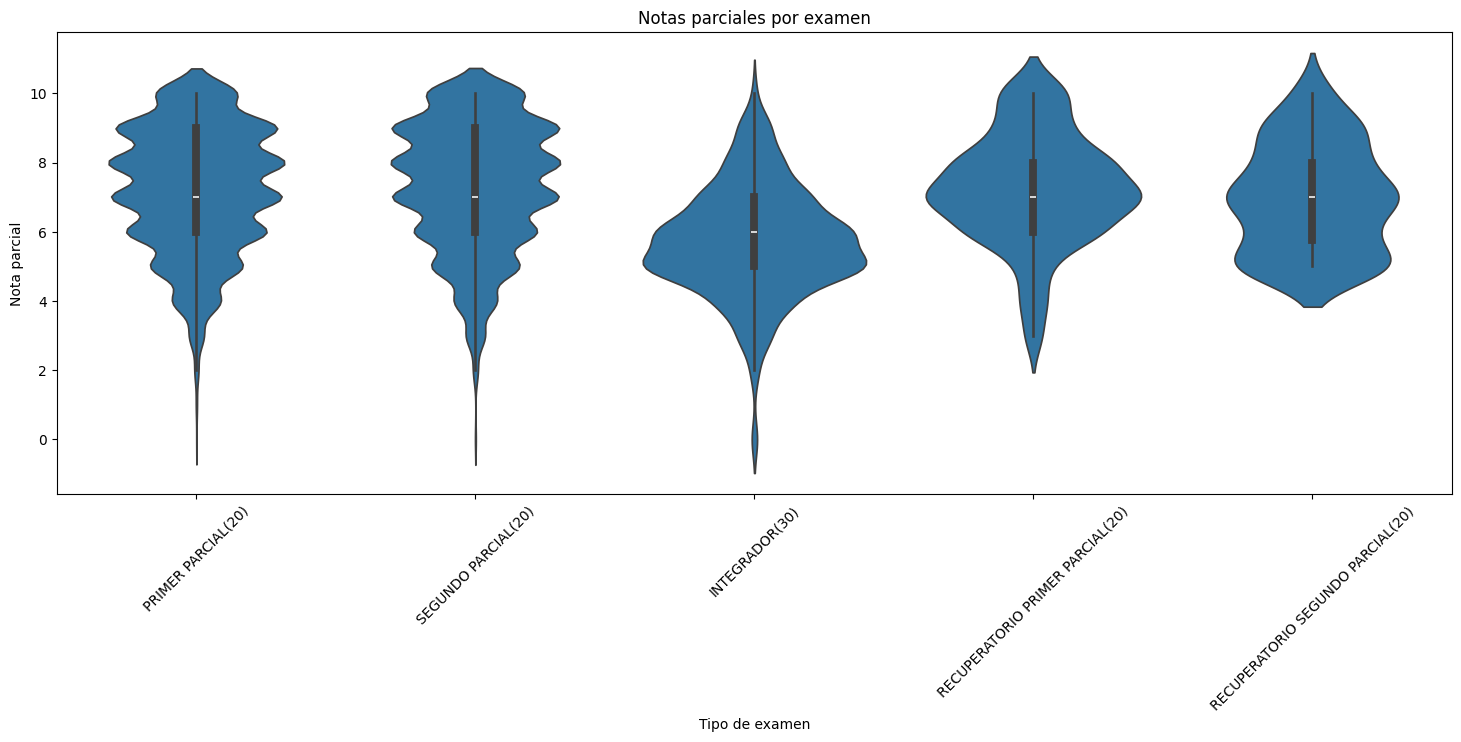

In [14]:
plt.figure(figsize=(18, 6))
sns.violinplot(x="nombre_examen", y="nota_parcial", data=df_estudiantes)
plt.title("Notas parciales por examen")
plt.xlabel("Tipo de examen")
plt.ylabel("Nota parcial")
plt.xticks(rotation=45)
plt.show()

In [77]:
grouped_course_nota = df_estudiantes.groupby("course_name")["nota_final_materia"].mean().reset_index()

top_best = grouped_course_nota[grouped_course_nota.nota_final_materia >= 9.5].sort_values("nota_final_materia")
top_20_worst = grouped_course_nota.sort_values("nota_final_materia").head(20)
grouped_course_nota.describe()

,nota_final_materia
count,513.000000
mean,7.563699
std,1.271749
min,2.000000
25%,7.000000
50%,7.666667
75%,8.400000
max,10.000000


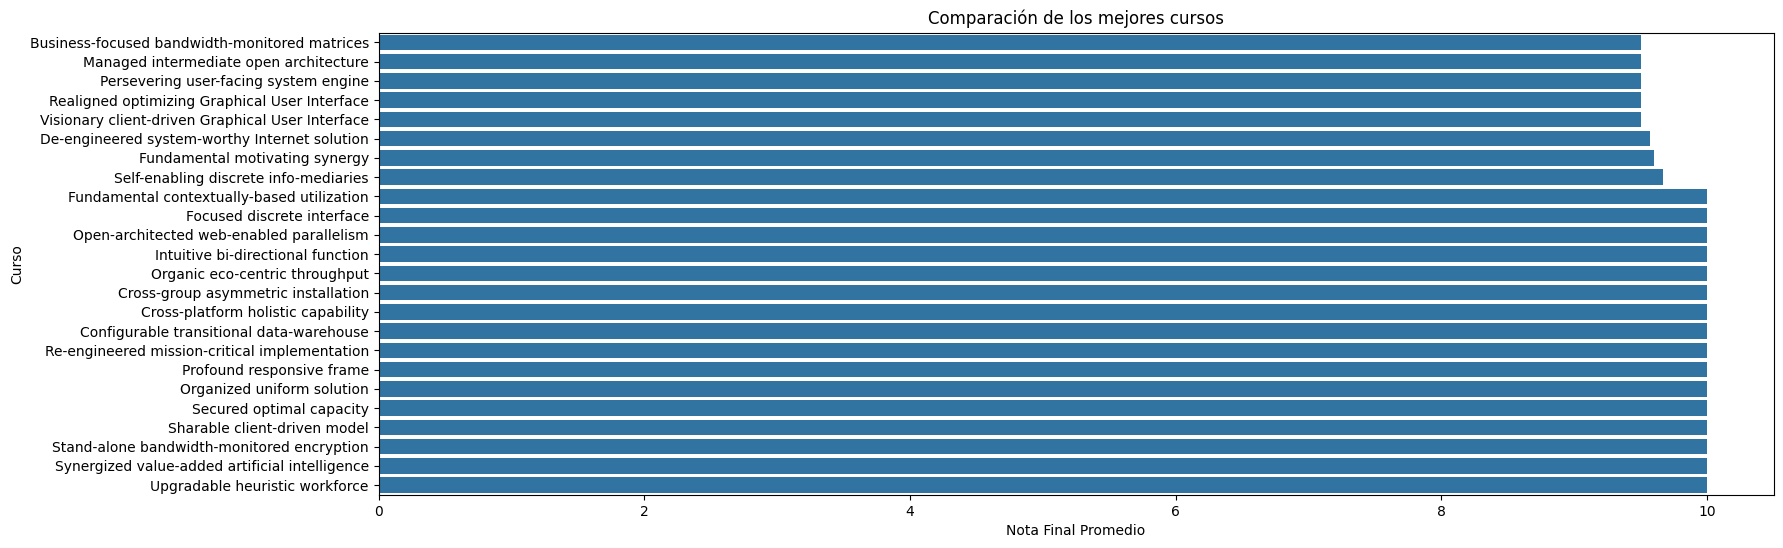

In [75]:
plt.figure(figsize=(18, 6))
sns.barplot(x="nota_final_materia", y="course_name", data=top_best)
plt.title("Comparación de los mejores cursos")
plt.xlabel("Nota Final Promedio")
plt.ylabel("Curso")
plt.show()

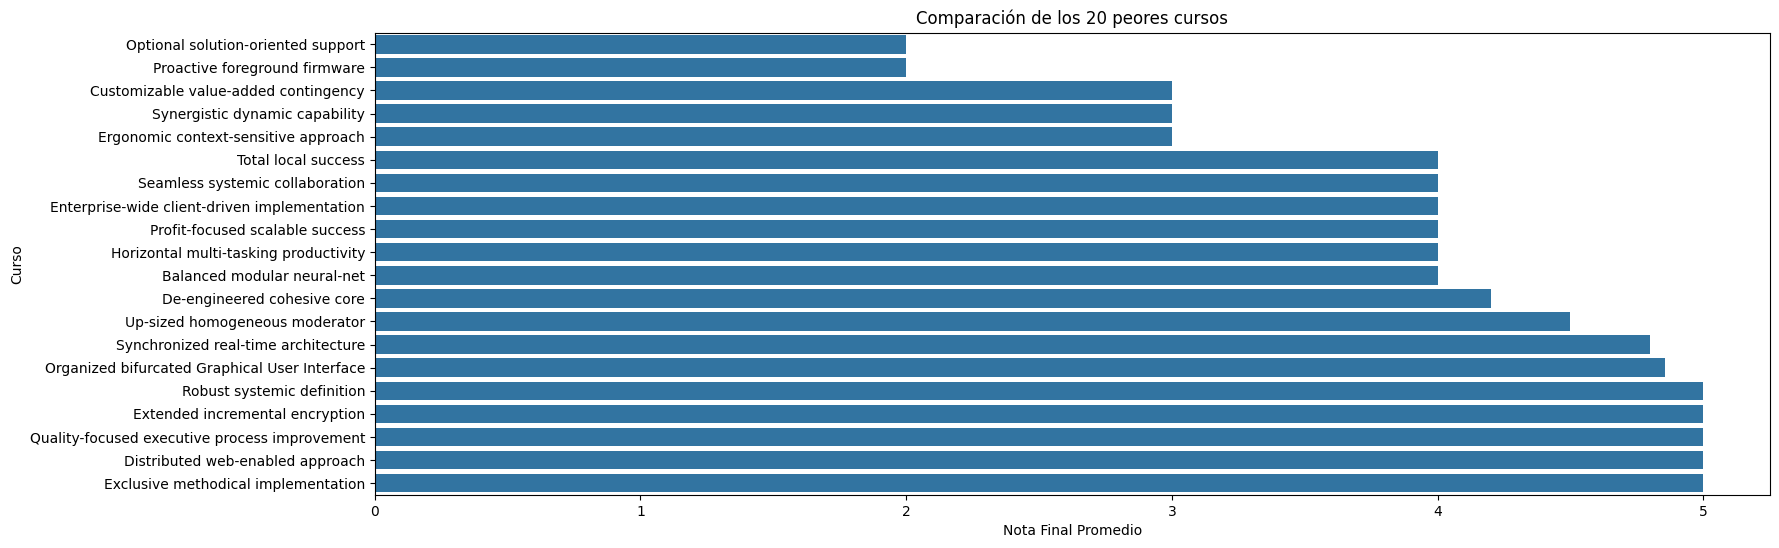

In [70]:
plt.figure(figsize=(18, 6))
sns.barplot(x="nota_final_materia", y="course_name", data=top_20_worst)
plt.title("Comparación de los 20 peores cursos")
plt.xlabel("Nota Final Promedio")
plt.ylabel("Curso")
plt.show()

In [90]:
grouped_user_nota = df_estudiantes[df_estudiantes.nota_final_materia != 0.].groupby("user_uuid")["nota_final_materia"].mean().reset_index()
grouped_user_nota = grouped_user_nota.sort_values("nota_final_materia", ascending=False)

top_10_user = grouped_user_nota.head(10)
worst_10_user = grouped_user_nota.tail(10)

grouped_user_nota.describe()

,nota_final_materia
count,576.000000
mean,7.483671
std,1.285322
min,2.500000
25%,6.741071
50%,7.500000
75%,8.500000
max,10.000000


In [92]:
top_10_user #becas

,user_uuid,nota_final_materia
547,f3237a6a-4235-4414-b6e6-f8c8e5d7a9de,10.000000
459,cc71d626-9d0c-4298-8844-75a3153e0582,10.000000
294,88a224e3-2e2e-4003-9cc6-93e95f36ec2f,10.000000
310,8cbf73d4-1e6d-47fd-af52-686c01baab89,10.000000
263,7adaf3b1-c602-45f0-a7d7-0e0adeb81613,10.000000
124,347be0de-8c4b-461b-8357-bf7a48fbdb7c,10.000000
161,4955692f-0d28-418c-b4b7-ed8d44d51efc,10.000000
346,98a138bf-7c50-476c-9a4b-204a52d96af8,10.000000
394,ad5e973a-37dd-484e-a2a2-7eb1ddaa1947,10.000000
150,43f2c0ac-5fbd-438d-a50f-0d70da9876f4,9.866667


In [93]:
worst_10_user #ayudas

,user_uuid,nota_final_materia
51,17aa895c-3173-4db7-90eb-6a7549773700,4.264706
262,796b25bb-2b04-408b-be40-b2cc53156ec7,4.200000
561,f81ef422-2606-4554-97ee-2b80fe604e62,4.150000
210,5b538d2a-f1f0-4f97-8917-6cf00d7328c0,4.000000
381,a7edbe61-30e4-4a41-9095-ac4867ba30af,3.733333
133,3a66f17f-8eb4-4a66-bade-6cf4d11c5a3c,3.692308
502,e25e84b6-d99c-4d74-b5fb-8ee3ea8f2254,3.625000
374,a3304677-16c0-4c8c-834a-4f24df0e8c0e,3.000000
559,f7cc14ec-4281-45bf-8e60-a28db62eda29,3.000000
289,8496744b-3a5f-4322-8c09-20df1f699571,2.500000


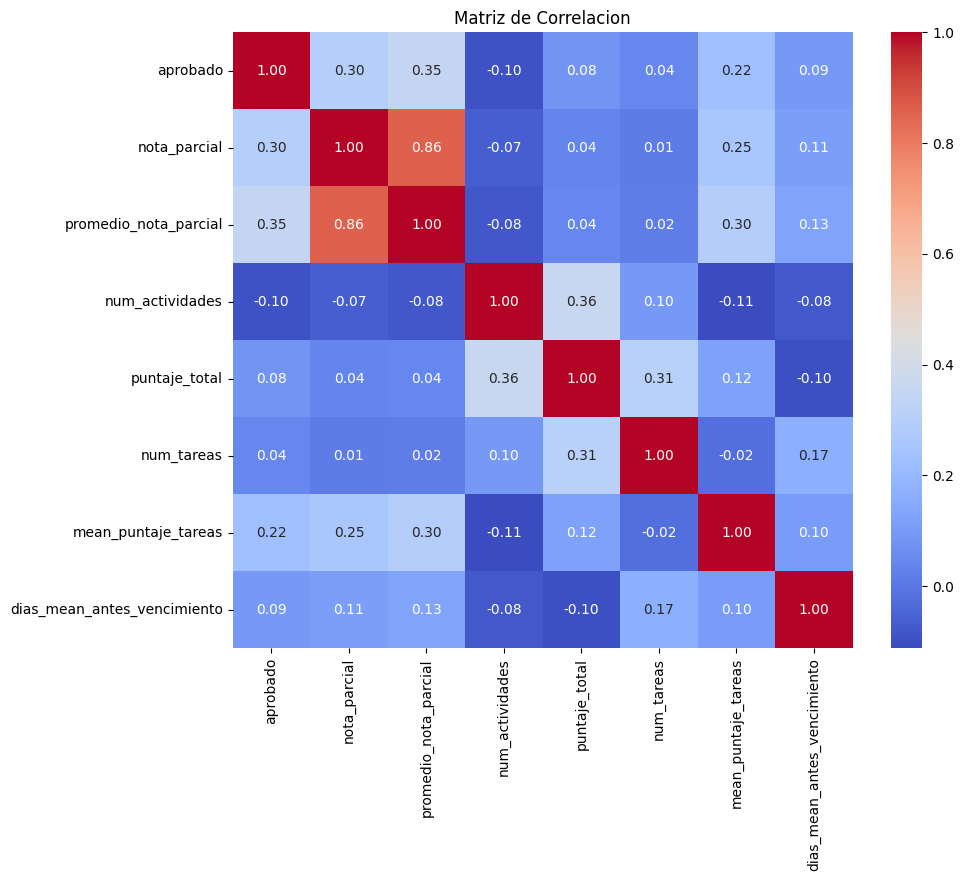

In [15]:
variables_relevantes = ["aprobado", "nota_parcial", "promedio_nota_parcial",
                       "num_actividades", "puntaje_total", "num_tareas", "mean_puntaje_tareas", 
                       "dias_mean_antes_vencimiento"]

df_filtrado = df_estudiantes[variables_relevantes].copy()  

df_filtrado.fillna(df_filtrado.mean(), inplace=True)  

matriz_correlacion = df_filtrado.corr()

correlaciones_con_aprobado = matriz_correlacion["aprobado"].drop("aprobado")  

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlacion")
plt.show()

interval columns not set, guessing: ['aprobado']


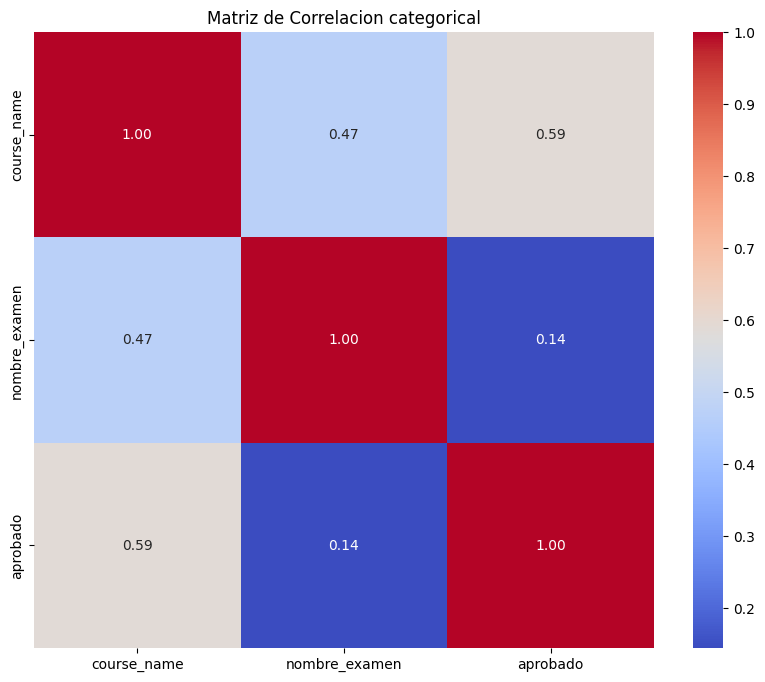

In [16]:
correlations_categorical = phik_matrix(df_estudiantes[["course_name","nombre_examen","aprobado"]])
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_categorical, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlacion categorical")
plt.show()

- Existen diferencias estadisticamente significativas en las medias de la nota final entre los diferentes cursos

In [95]:
# ANOVA para comparar medias de la nota final entre diferentes cursos
groups = df_estudiantes.groupby("course_name")["nota_final_materia"].apply(list)
f_stat, p_val = f_oneway(*groups)

# usando Tukey puedo saber cuales son
print(f"F-statistic: {f_stat}, p-value: {p_val}")

F-statistic: 4.534542469746267, p-value: 2.952925326374108e-184


- Los estudiantes que aprobaron la materia tienen en promedio, notas parciales significativamente mas altas que los estudiantes que no aprobaron

In [110]:
# Grupos según aprobacion T-Test
approved = df_estudiantes[df_estudiantes["aprobado"] == 1]["nota_parcial"]
not_approved = df_estudiantes[df_estudiantes["aprobado"] == 0]["nota_parcial"]

t_stat, p_val = ttest_ind(approved, not_approved)

print(f"T-statistic: {t_stat}, p-value: {p_val}")

T-statistic: 26.274203068983066, p-value: 3.3861951273431734e-145


- La nota parcial es un buen predictor de la nota final. Los estudiantes con notas parciales altas tienen mas probabilidades de obtener una nota final alta, y viceversa

In [111]:
# Correlación entre nota final y nota parcial
correlation, p_val = pearsonr(df_estudiantes["nota_final_materia"], df_estudiantes["nota_parcial"])

print(f"Correlation: {correlation}, p-value: {p_val}")

Correlation: 0.7303213481689945, p-value: 0.0


In [ ]:
# notas

# continuar con EDA
# hacer analisis temporal
# buscar caracteristicas nueavs para el modelado en base a este analisis 

In [114]:
df_entregas = pd.read_csv("../data/df_entregas.csv")
df_entregas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43119 entries, 0 to 43118
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_uuid               43119 non-null  object 
 1   course_uuid             43119 non-null  object 
 2   legajo                  43119 non-null  object 
 3   course_name             43119 non-null  object 
 4   periodo                 43119 non-null  object 
 5   particion               43119 non-null  int64  
 6   assignment_id           26061 non-null  float64
 7   ass_name                43119 non-null  object 
 8   ass_name_sub            24206 non-null  object 
 9   sub_uuid                24206 non-null  object 
 10  submission_type         24206 non-null  object 
 11  ass_created_at          43119 non-null  object 
 12  ass_due_at              41011 non-null  object 
 13  ass_unlock_at           39195 non-null  object 
 14  ass_lock_at             40917 non-null

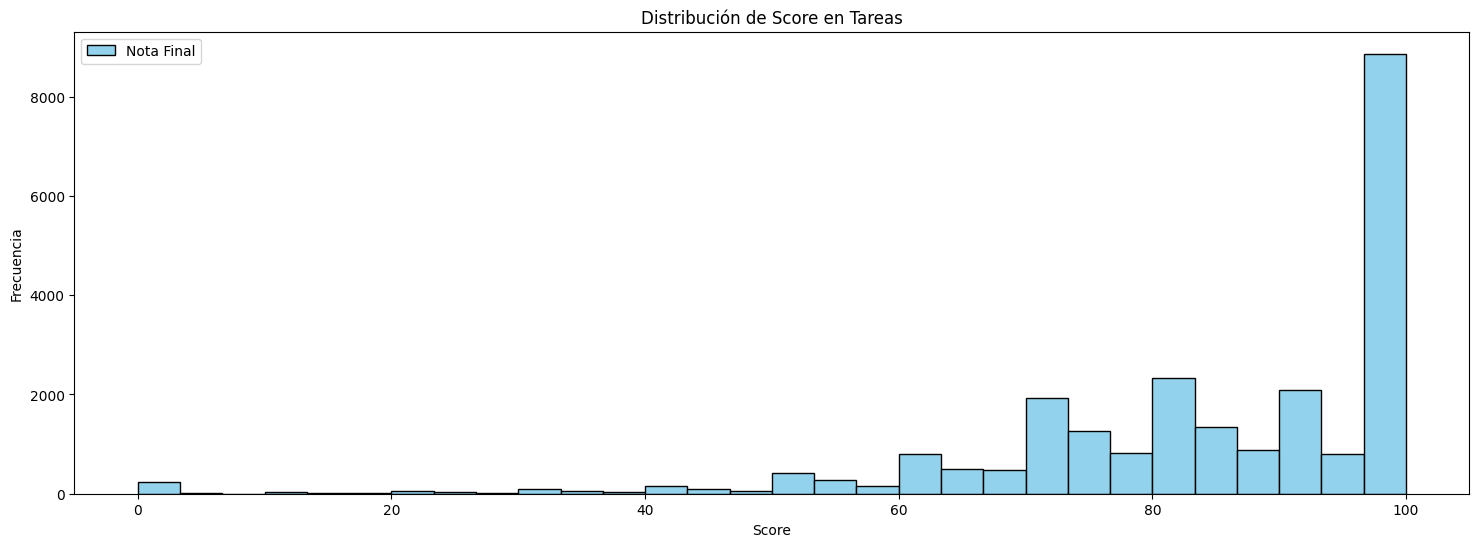

In [121]:
plt.figure(figsize=(18, 6))
sns.histplot(df_entregas["score"], bins=30, color="skyblue", label="Nota Final", alpha=0.9)

plt.title("Distribución de Score en Tareas")
plt.xlabel("Score")
plt.ylabel("Frecuencia")
plt.legend()  
plt.show()

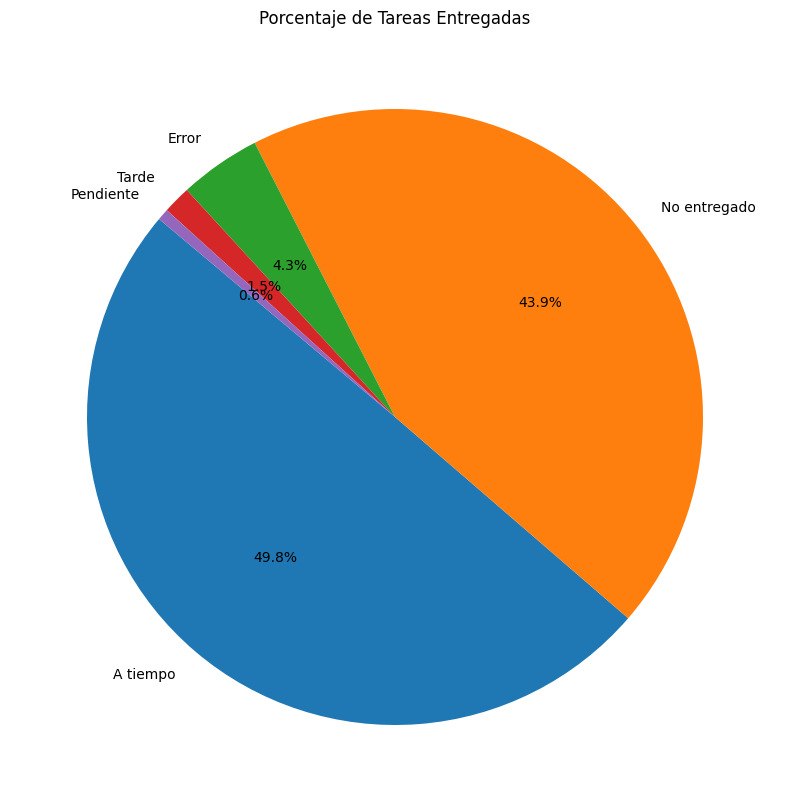

In [133]:
on_time = df_entregas["on_time"].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(on_time, labels=["A tiempo","No entregado", "Error", "Tarde", "Pendiente"], autopct="%1.1f%%", startangle=140)
plt.title("Porcentaje de Tareas Entregadas")
plt.show()

In [145]:
df_entregas[df_entregas.tiempo_calificacion >= 0.]["tiempo_calificacion"].describe()

count    23868.000000
mean        39.372486
std        125.794464
min          0.000000
25%          0.000000
50%          0.000000
75%          0.300000
max       2200.500000
Name: tiempo_calificacion, dtype: float64

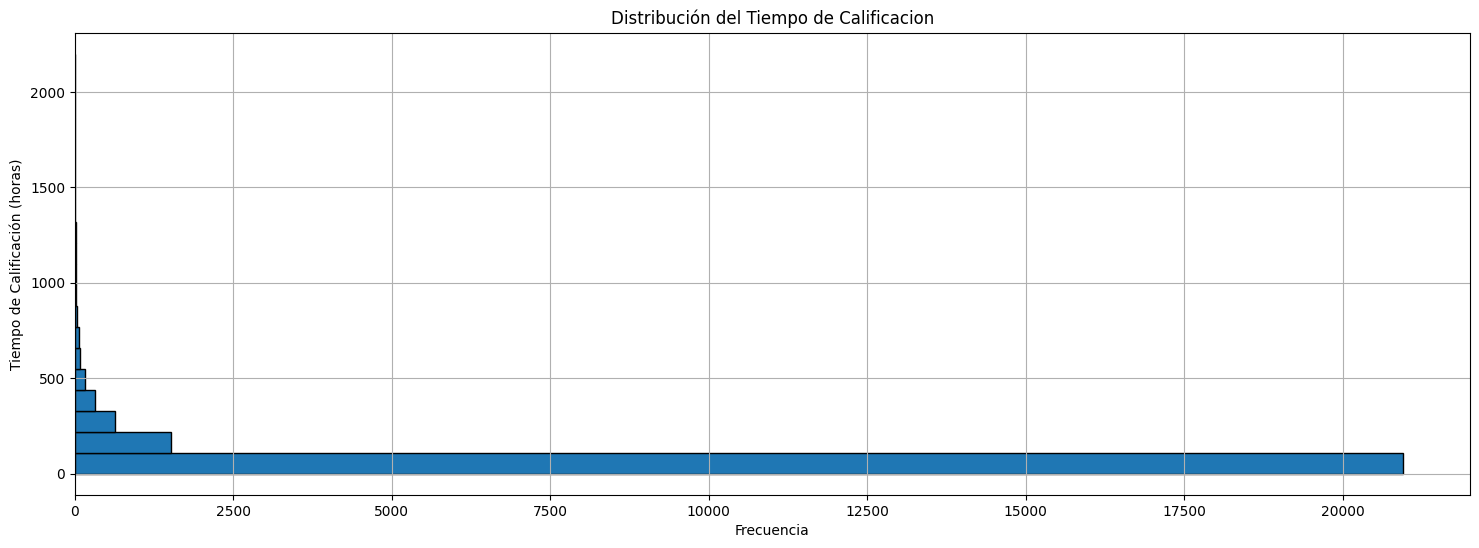

In [141]:
plt.figure(figsize=(18, 6))
plt.hist(df_entregas[df_entregas.tiempo_calificacion >= 0.]["tiempo_calificacion"], orientation="horizontal", bins=20, edgecolor="black")
plt.ylabel("Tiempo de Calificación (horas)")
plt.xlabel("Frecuencia")
plt.title("Distribución del Tiempo de Calificacion")
plt.grid(True)
plt.show()

In [148]:
df_entregas["dias_antes_vencimiento"].describe()

count    22098.000000
mean        13.590370
std         17.374162
min         -4.000000
25%          0.000000
50%          7.000000
75%         20.000000
max        123.000000
Name: dias_antes_vencimiento, dtype: float64

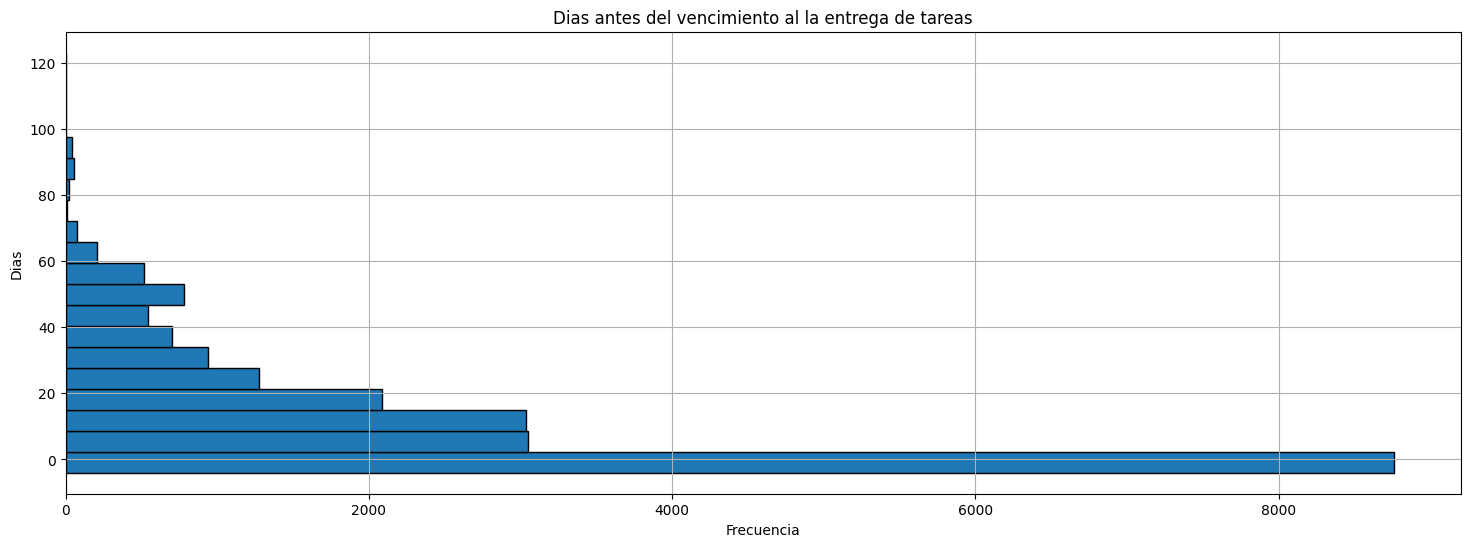

In [147]:
plt.figure(figsize=(18, 6))
plt.hist(df_entregas["dias_antes_vencimiento"], orientation="horizontal", bins=20, edgecolor="black")
plt.ylabel("Dias")
plt.xlabel("Frecuencia")
plt.title("Dias antes del vencimiento al la entrega de tareas")
plt.grid(True)
plt.show()